In [3]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
# Using dummies
insurance_dummies = pd.get_dummies(insurance)
insurance_dummies.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [12]:
# Create X and y values(feautures and labels)
X = insurance_dummies.drop("charges", axis=1)
y = insurance_dummies["charges"]

In [13]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [14]:
# Build a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8806.8252 - mae: 8806.8252
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7890.2881 - mae: 7890.2881
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7845.4512 - mae: 7845.4512
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7659.4692 - mae: 7659.4692
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7506.6689 - mae: 7506.6689
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7940.8301 - mae: 7940.8301
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7542.5068 - mae: 7542.5068
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7523.9741 - mae: 7523.9741
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7785.0615 - mae: 7785.0615
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7852.3096 - mae: 7852.3096

In [18]:
# Check teh results of the insurance model on the test data
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8733.0049 - mae: 8733.0049


[8733.0048828125, 8733.0048828125]

In [20]:
y_train.median(), y_train.mean()

(9285.79435, 13350.339364466356)

From above,  the model in substantially wrong.

It has an mae of 8733 while the average price in 13350 and the median also is pretty off. If the price was to be charged by this model, it would charge atleast 1000 which is quite wrong

# Improving the model

* Adding extra layers
* Using the Adam optimizer
* Train for longer using 1000 epochs



In [28]:
# Set random seed
tf.random.set_seed(42)

# Adding an extra layer
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Using the Adam optimizer instead of SGD
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# Training for longer using 1000 epochs
history = model_2.fit(X_train, y_train, epochs=1000, verbose=0)


In [29]:
# Evaluate
model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3610.0059 - mae: 3610.0059


[3610.005859375, 3610.005859375]

Text(0.5, 0, 'epochs')

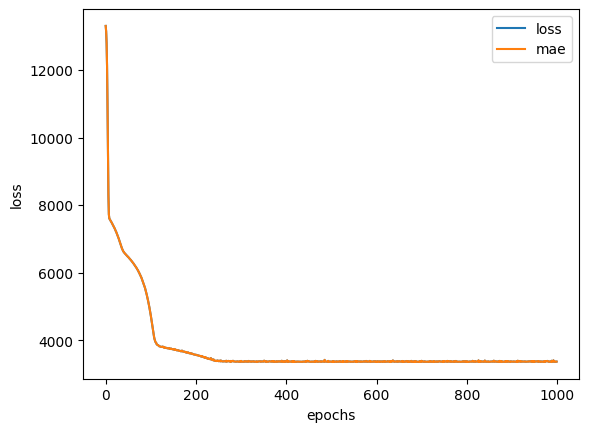

In [30]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Question**
# How long should I train for?

It depends. Really... It depends on the problem at hand

Tensorflow has a solution to this. **The EarlyStopping Callback**(https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) It is a Tensorflow component that stops training when a monitored metric has stopped improving.


# Preprocessing data (normalization and standardization)

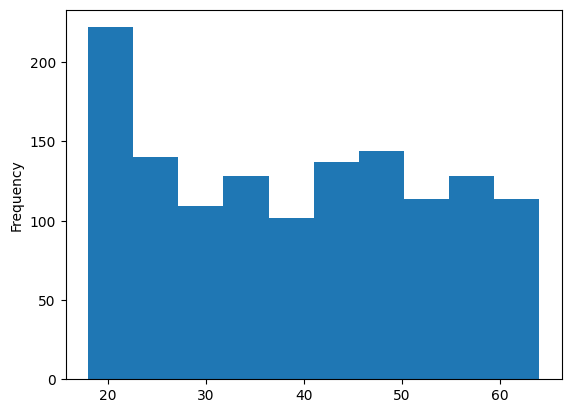

In [35]:
X["age"].plot(kind='hist');

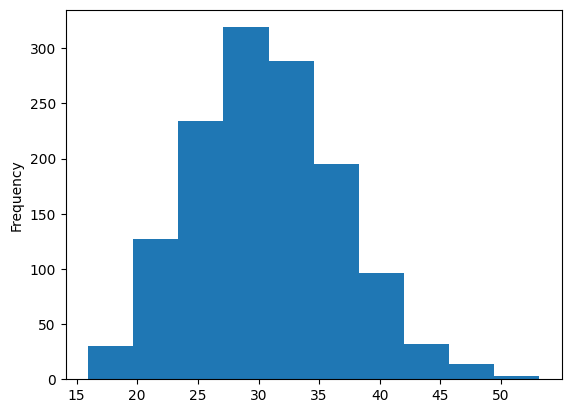

In [34]:
X["bmi"].plot(kind='hist');

In [37]:
X['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

The above graphs have different scales.

 Normalization in Machine Learning - is a scaling technique in Machine Learning applied during data preparation to change the values of numeric columns in the dataset to use a common scale. It is not necessary for all datasets in a model. It is required only when features of machine learning models have different ranges.

In [38]:
import pandas as pd
import matplotlib.pyplot as ply
import tensorflow as tf

# Read the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [40]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),# turn all values in columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ['sex', 'smoker', 'region'])
)

# Create X and y
X = insurance.drop('charges', axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test_data with normalizataion (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [44]:
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [43]:
# What does the data look like now
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [45]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

The data has been normalized and one hot encoded. Now build a neural network model on it

In [47]:
# Build a neural network model on the normalized data

# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fit the model
model_3.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13343.6738 - mae: 13343.6738
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13335.4746 - mae: 13335.4736
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13314.5068 - mae: 13314.5068
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13270.9082 - mae: 13270.9082
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13194.3311 - mae: 13194.3311
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13074.3008 - mae: 13074.3008
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 12900.6348 - mae: 12900.6348
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 12663.1006 - mae: 12663.1006
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 12351.3369 - mae: 12351.3369
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 11959.93

In [48]:
# Evaluate the model on normalized data
model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3441.9158 - mae: 3441.9158


[3441.915771484375, 3441.915771484375]